In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string


In [2]:
data = pd.read_csv('News.csv')
data.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
data.shape

(44919, 6)

In [4]:
data.drop(["title", "subject", "date"], axis=1)

,Unnamed: 0,text,class
0,0,Donald Trump just couldn t wish all Americans ...,0
1,1,House Intelligence Committee Chairman Devin Nu...,0
2,2,"On Friday, it was revealed that former Milwauk...",0
3,3,"On Christmas day, Donald Trump announced that ...",0
4,4,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44914,21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44915,21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44916,21414,MINSK (Reuters) - In the shadow of disused Sov...,1
44917,21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [5]:
#Checking null values and dropping the rows
data.isnull().sum()

Unnamed: 0     0
title          0
text           0
subject       21
date          21
class          0
dtype: int64

In [6]:
#Shuffle the data to prevent bias
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

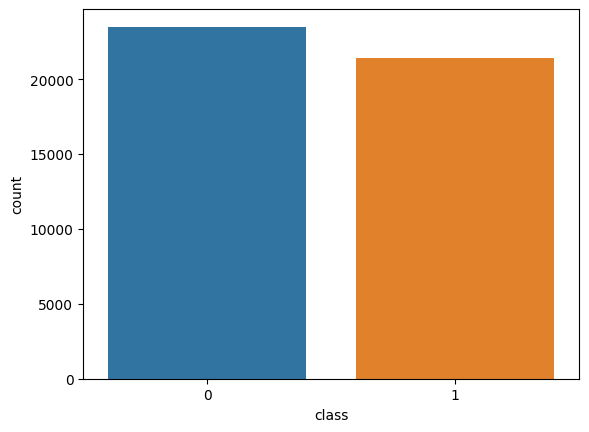

In [7]:
#Unique values of each category
sns.countplot(data=data,x='class',order=data['class'].value_counts().index)

In [9]:
#Function for text preprocessing
def word_clean(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub("\\W", " ", text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]'%re.escape(string.punctuation),'', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text


In [10]:
#Implement function in text column
data['text']= data['text'].apply(word_clean)

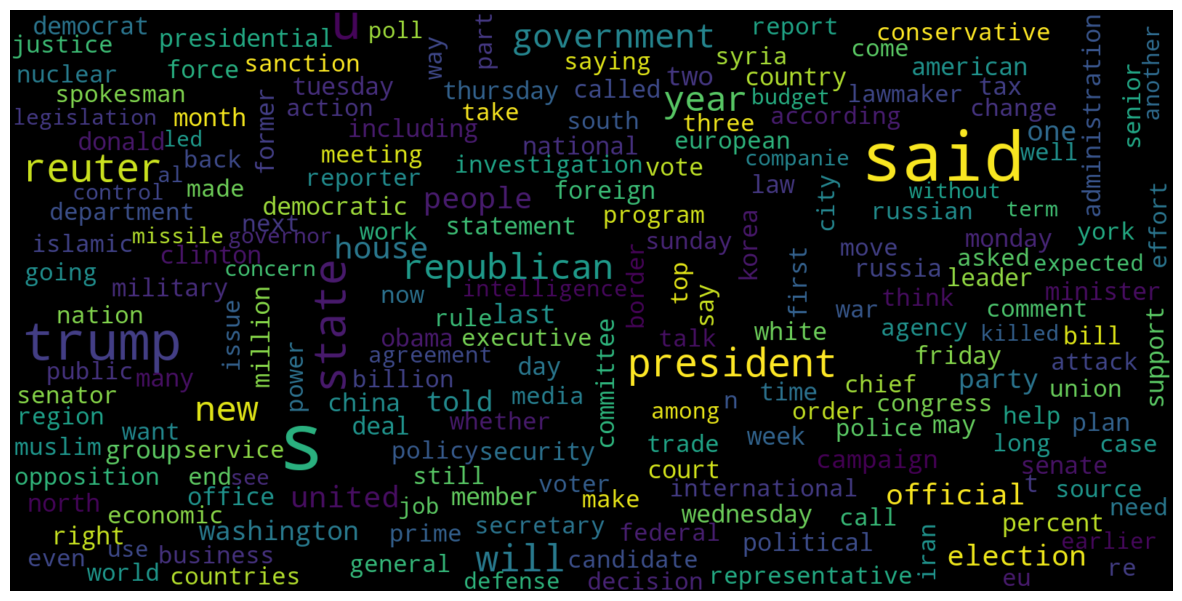

In [11]:
#Real word cloud
consolidated=' '.join(word for word in data['text'][data['class']==1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

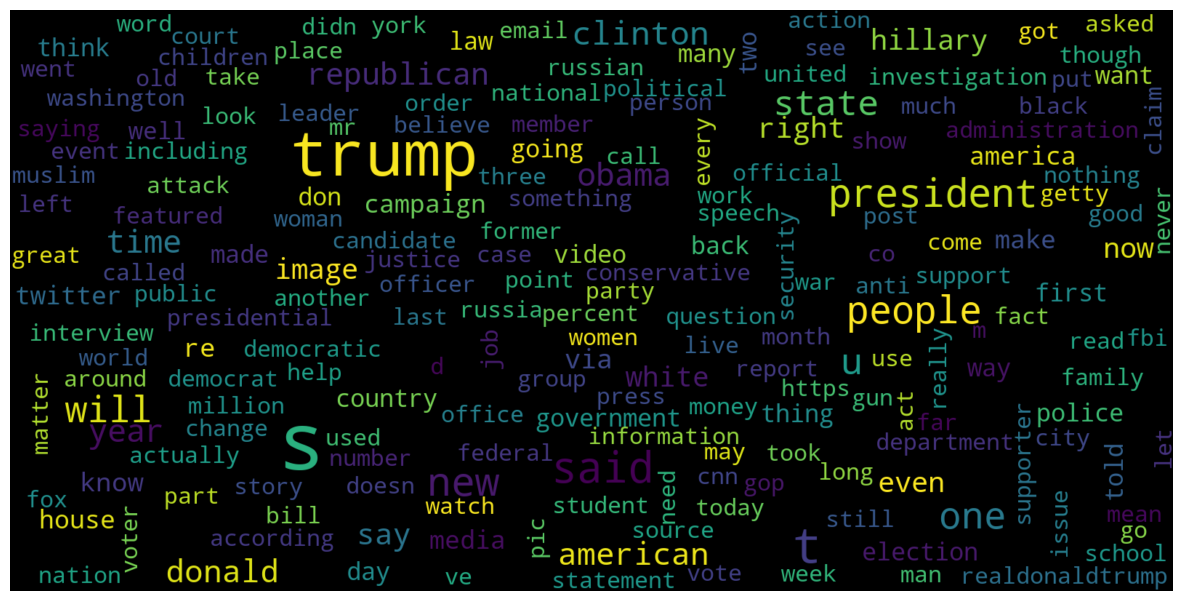

In [12]:
#Fake word cloud
consolidated=' '.join(word for word in data['text'][data['class']==0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
#Data splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.25)

In [14]:
#Conversion to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [15]:
#LR model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

#model testing
print(accuracy_score(y_train , model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9911246994567959
0.9864648263579697


In [16]:
#DT model
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

#model testing
print(accuracy_score(y_train, model2.predict(x_train)))
print(accuracy_score(y_test, model2.predict(x_test)))

0.9999703167205913
0.9956366874443455


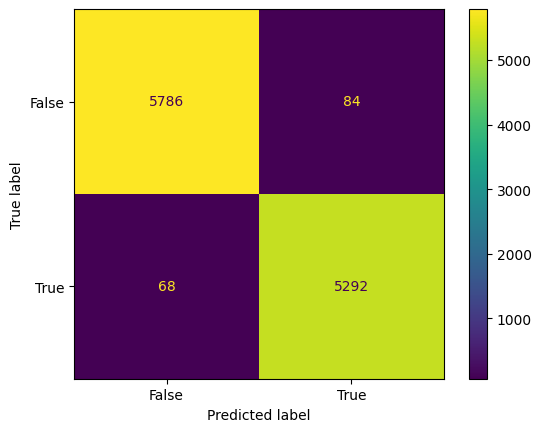

In [17]:
#Confusion matrix for DT classifier
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [18]:
#Manual Testing
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "True News"

def manual_testing(news):
  testing_news = {"text": [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(word_clean)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = model.predict(new_xv_test)
  pred_DT = model2.predict(new_xv_test)

  return print("\n\nLR Prediction: {} \nDT Prediction: {}".format(output_label(pred_LR[0]), output_label(pred_DT[0])))

news = str(input("Enter the news to be tested: "))
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News


In [19]:
import joblib
filename = 'finalLR_model.sav'
joblib.dump(model, filename)
filename2 = 'finalDT_model.sav'
joblib.dump(model2, filename2)
filename3 = 'vectorizer.sav'
joblib.dump(vectorization, filename3)

['vectorizer.sav']